In [242]:
### IMPORTING PACKAGES ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Homewrok #2 #


## Problem 1 ##
$\textbf{Part 1}$ \
From the equation \
$MSE = \frac{1}{N} \sum_i{(y_i - \hat{\beta_0})^2}$ \
We find a critical point
$\frac{\partial(MSE)}{\partial y_i} = 0 = \frac{2}{N} \sum_i{(y_i - \hat{\beta_0})}$ \
$\Rightarrow \sum_i{\hat{\beta_0}} = \sum_i{y_i} \Rightarrow \hat{\beta_0} = \frac{1}{N}\sum_i{y_i} = MEAN(y_i)$ 

$\textbf{Part 2}$ \
Substituting $Y_i$ for $y_i$: \
$B_0=\hat{\beta_0} = \frac{1}{N}\sum{(\beta_0 + \epsilon_i)} = \beta_0 + MEAN(\epsilon_i)$

$\textbf{Part 3}$ \
$E[B_{0}] = \beta_0$ because $MEAN(\epsilon_i) = 0$

$\textbf{Part 4}$ \
$Var(B_{0}) = Var(\hat{\beta_0}) = Var(\frac{1}{N}\sum{Y_i}) = \frac{1}{N^2} \sum{Var(Y_i)} = \frac{1}{N^2} \sum{\sigma^2} = \frac{N\sigma^2}{N^2} = \frac{\sigma^2}{N}$ \
The uncertainty in the estimate of $\beta_0$ decreases as the sample size increases.

## Problem 2 ##

In [243]:
N = 10
beta_o = 2
sigmasq = 1

epsilon = np.random.normal(0, np.sqrt(sigmasq), N) #Part 1
y = beta_o + epsilon

LSE = np.mean(y) #Part 2

#No need to define a function, t's incorporated in numpy
B_olist = np.random.normal(2, np.sqrt(sigmasq), (100,N)) #centered at 2, with variance of 1
means = np.mean(B_olist, axis = 1)
variability = np.var(B_olist, axis = 1)


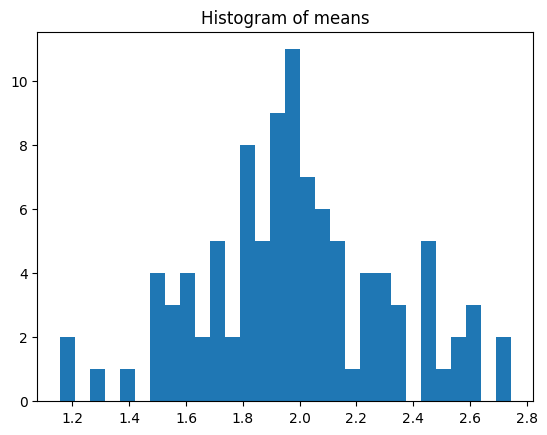

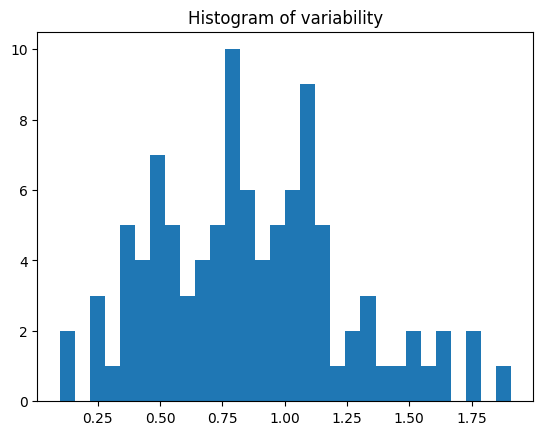

In [244]:
# fig, axs = plt.subplots(1, 2, figsize = (12, 7)) #Setting up the plot
# fig.set_tight_layout(True)
# fig.suptitle("Histograms with different amount of bins")

plt.hist(means, bins = 30)
plt.title("Histogram of means")
plt.show()
plt.hist(variability, bins = 30)
plt.title("Histogram of variability")
plt.show()


$\textbf{Part 5}$ \
The variance should be $\frac{\sigma^2}{N} = 1/10$, but seem to be significantly higher than that. This is likely due to the fact that the sample size is too small.
The mean looks like a gaussian distribution centered at around $2=\beta_0$, which is expected.

## Problem 3 ##

In [245]:
N = 100
x = np.random.normal(0, 1, N)
y = x**2 + np.random.normal(0, 1, N)

xTrain = x[:int(N/2)]
yTrain = y[:int(N/2)]

sorted_indicies = np.argsort(xTrain) #need to sort with right indicies
xTrain = xTrain[sorted_indicies]
yTrain = yTrain[sorted_indicies]

xTest = x[int(N/2):]
yTest = y[int(N/2):]
# print(y)
# print(len(y), len(x))

In [246]:
from scipy.interpolate import UnivariateSpline

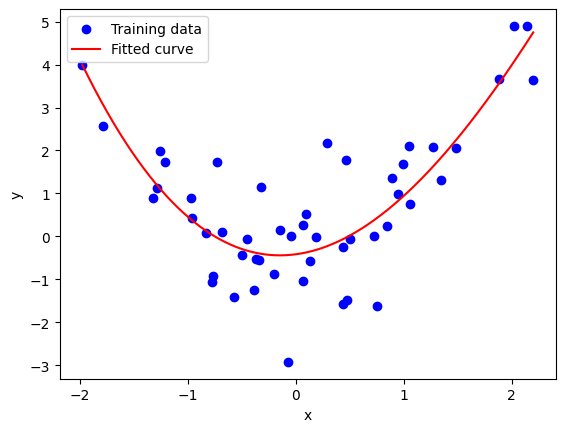

In [247]:
tck = UnivariateSpline(xTrain, yTrain, s = 100)

xfit = np.linspace(np.min(xTrain), np.max(xTrain), 1000)
yfit = tck(xfit)

plt.scatter(xTrain, yTrain, color = 'blue', label = 'Training data')
plt.plot(xfit, yfit, color = 'red', label = 'Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [248]:
def fMSE(fit, x, y): #Part 3
    MSE = np.mean((fit(x) - y)**2)
    return MSE
print('MSE on testing data for spline: ', fMSE(tck, xTest, yTest)) 
print('MSE on training data for spline: ', fMSE(tck, xTrain, yTrain))

MSE on testing data for spline:  1.1889698093235095
MSE on training data for spline:  0.8703551418069396


The MSE on the testing data is largest, which is to be expected, since the model optimizes for the training data.

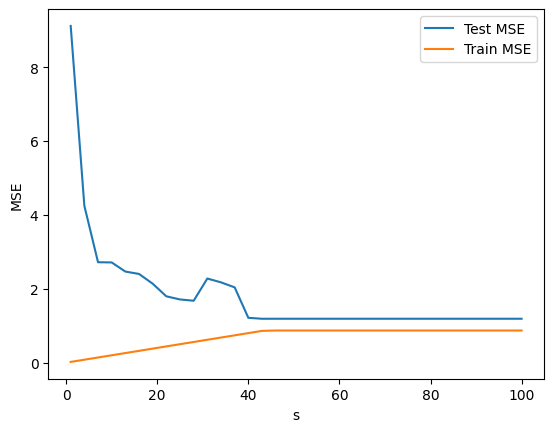

In [292]:
testmse, trainmse = [], []
dfs = np.linspace(1, 100, 34)

for df in dfs:
    fit = UnivariateSpline(xTrain, yTrain, s = df)
    testmse.append(fMSE(fit, xTest, yTest))
    trainmse.append(fMSE(fit, xTrain, yTrain))

plt.plot(dfs, testmse, label = 'Test MSE')
plt.plot(dfs, trainmse, label = 'Train MSE')
plt.xlabel('s')
plt.ylabel('MSE')
plt.legend()
plt.show()

$\textbf{Part 4 continued}$ \
Here, s is not degrees of freedom, but a smoothnes factor, which is inversely proportional to the degrees of freedom. For low s values we get a very high MSE on the testing data, which makes sense since we have overfitted the training data. For high values of s, we get a higher MSE on the training data, which is expected since we dont fit to all the features of the random error. The optimal value of s would be around 50, where the MSEs seems to converge.

$\textbf{Part 5}$ \
The lowest possible error is when $Var(\hat{f}(x_0)) = 0$ and $[Bias(\hat{f}(x_0))]^2 = 0$. Then we are left with $Var(\epsilon) = 1$ and therefore the lowest possible MSE is 1.